# Библиотеки

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Реализация MINE

In [4]:
class MINE(nn.Module):
    def __init__(self, input_dim_x, input_dim_y, hidden_dim=100):
        super(MINE, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim_x + input_dim_y, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x, y):
        joint = torch.cat([x, y], dim=-1)
        return self.net(joint)

    def sample(self, x, y):
        batch_size = x.size(0)
        idx = torch.randperm(batch_size)
        x_marginal = x
        y_marginal = y[idx]
        return x_marginal, y_marginal

In [19]:
def train_mine(model, data_loader, epochs=1000, lr=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.to(device)

    model.train()
    mi_estimates = []

    for epoch in tqdm(range(epochs), desc="Эпоха", leave=False, position=-1):
        mi_epoch = 0.
        num_batches = 0

        for x, y in tqdm(data_loader, desc=f"Итерация", leave=False, position=-2):
            x, y = x.to(device), y.to(device)

            joint = model(x, y)
            x_m, y_m = model.sample(x, y)
            marginal = model(x_m, y_m)

            et = torch.exp(marginal).mean()
            mutual_info = joint.mean() - torch.log(et)

            loss = -mutual_info 
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            mi_epoch += mutual_info.item()
            num_batches += 1

        mi_epoch /= num_batches
        mi_estimates.append(mi_epoch)

    return mi_estimates

# Эксперимент

In [15]:
def generate_data(n_samples=10000, rho=0.8):
    mean = [0, 0]
    cov = [[1, rho], [rho, 1]]
    data = np.random.multivariate_normal(mean, cov, n_samples)
    x = data[:, 0].reshape(-1, 1)
    y = data[:, 1].reshape(-1, 1)
    return torch.FloatTensor(x), torch.FloatTensor(y)

In [20]:
MI = np.array([])

for rho in tqdm(np.arange(-0.9, 1, 0.1), desc='Прогон экспериментов'):
    x, y = generate_data(n_samples=100000, rho=rho)

    dataset = torch.utils.data.TensorDataset(x, y)
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=256, shuffle=True)

    mine_model = MINE(input_dim_x=1, input_dim_y=1, hidden_dim=100)

    mi_history = train_mine(mine_model, data_loader, epochs=10, lr=1e-3)

    MI = np.append(MI, mi_history[-1])

Прогон экспериментов:   0%|          | 0/19 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Эпоха:   0%|          | 0/10 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

Итерация:   0%|          | 0/391 [00:00<?, ?it/s]

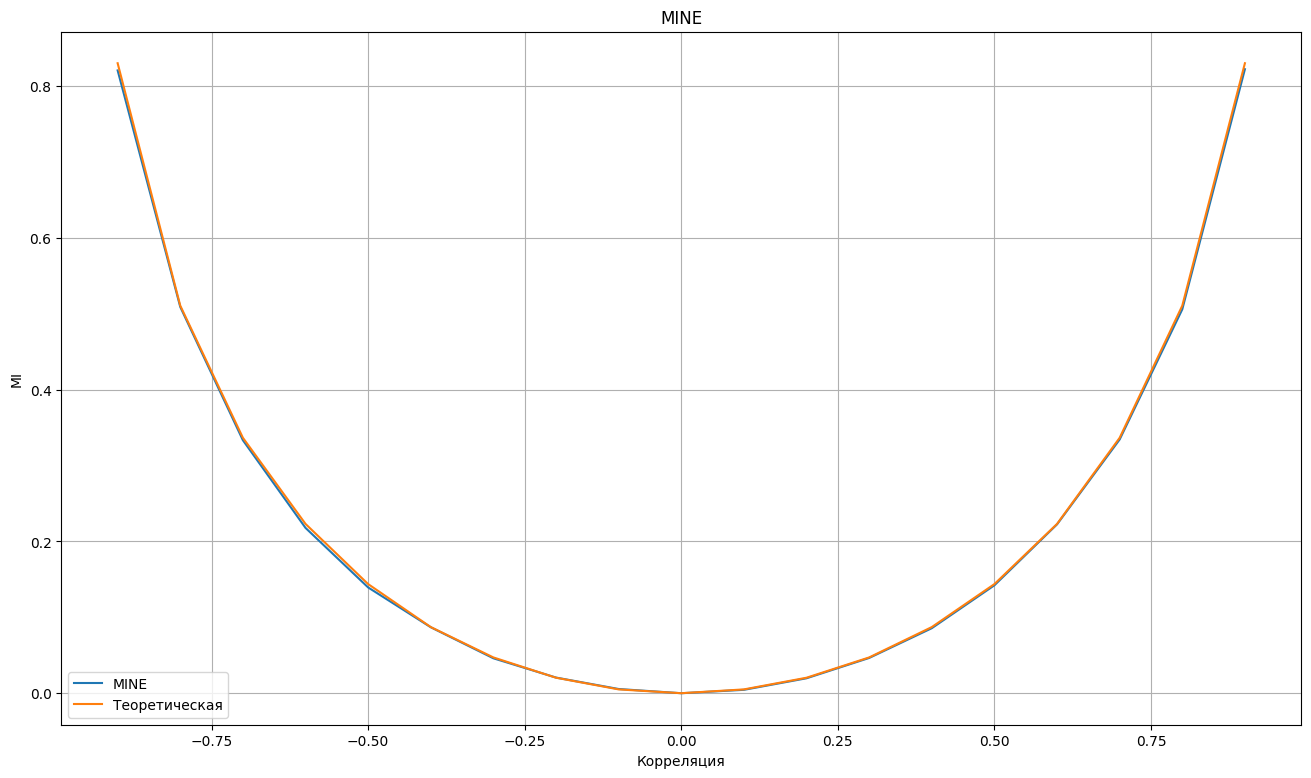

In [21]:
plt.figure(figsize=(16, 9))
plt.plot(np.arange(-0.9, 1, 0.1), MI, label='MINE')
plt.plot(np.arange(-0.9, 1, 0.1), -0.5 * np.log(1 - (np.arange(-0.9, 1, 0.1)) ** 2), label='Теоретическая')
plt.title("MINE")
plt.xlabel("Корреляция")
plt.ylabel("MI")
plt.legend()
plt.grid(True)
plt.show()